# The Perceptron

The [Perceptron](https://en.wikipedia.org/wiki/Perceptron) and its learning algorithm pioneered the research in neurocomputing.

* The perceptron is an algorithm for learning a linear binary classifier. 
* That is a function that maps its input $\vec{x}\in\mathbb{R}^n$ (a real-valued vector) to an output value $f(\vec{x})$ (a single binary value) as,

$$
f(\vec{x}) = \begin{cases}
                1 & \text{if }\vec{w} \cdot \vec{x} + b > 0\,,\\
                0 & \text{otherwise};
             \end{cases}
$$

where $\vec{w}$ is a vector of real-valued *weights*, $\vec{w} \cdot \vec{x}$ is the *dot product* $\sum_{i=1}^n w_i x_i$, and $b$ is known as the *bias*. 

## Perceptron learning

Learning goes by calculating the prediction of the perceptron, $\hat{y}$, as

$$\hat{y} = f\left(\vec{w}\cdot\vec{x} + b) = f( w_{1}x_{1} + w_2x_{2} + \cdots + w_nx_{n}+b\right)\,.$$

After that, we update the weights and the bias using the perceptron rule:

$$
\begin{align*}
w_i & = w_i + \alpha (y - \hat{y}) x_{i} \,,\  i=1,\ldots,n\,;\\
b & = b + \alpha (y - \hat{y})\,.
\end{align*}
$$

Here $\alpha\in\left(0,1\right]$ is known as the *learning rate*.

In [49]:
# init
import itertools
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as pl
import pandas as pd
%matplotlib inline

# Size matters in plots.
pl.rcParams['figure.figsize'] = (12.0, 10.0)

# Plotting with style! 
import seaborn as sb

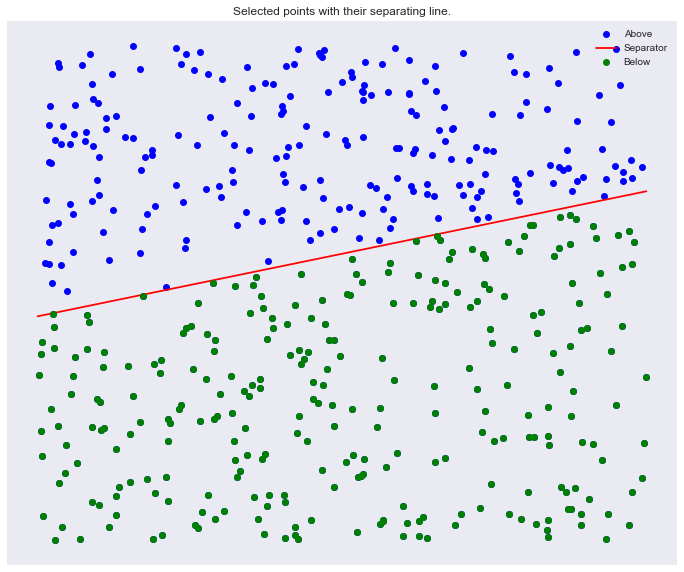

In [23]:
# Generate some points
N = 500
xn = nr.rand(N,2)

x = np.linspace(0,1);

# Pick a line 
a = nr.rand();
b = nr.rand();
f = lambda x : a*x + b;

fig =pl.figure()
figa = pl.gca();

pl.plot(xn[:,0],xn[:,1],'bo');
pl.plot(x,f(x),'r')

# Linearly separate the points by the line
yn = np.zeros([N,1]);

for i in range(N):
    if(f(xn[i,0])>xn[i,1]):
        # Point is below line
        yn[i] = 1;
        pl.plot(xn[i,0],xn[i,1],'go')
    else:
        # Point is above line
        yn[i] = -1;
        
        
pl.legend(['Above','Separator','Below'],loc=0)
pl.title('Selected points with their separating line.')
figa.axes.get_xaxis().set_visible(False)
figa.axes.get_yaxis().set_visible(False)


In [24]:
def perceptron(xn,yn,MaxIter=10000,w=np.zeros(3)):
    '''
        A very simple implementation of the perceptron algorithm for two dimensional data.
        
        Given points (x,y) with x in R^{2} and y in {0,1}, the perceptron learning algorithm searches for the best
        line that separates the data points according to the difference classes defined in y. 
    '''
    
    N = xn.shape[0];
    
    # Separating curve
    f = lambda x: np.sign(w[0]+w[1]*x[0]+w[2]*x[1]);

    for _ in range(MaxIter):
        i = nr.randint(N);
        if(yn[i] != f(xn[i,:])): # If not classified correctly, adjust the line to account for that point.
             w[0] = w[0] + yn[i];
             w[1] = w[1] + yn[i]*xn[i,0];
             w[2] = w[2] + yn[i]*xn[i,1];
            
    return w;

[  6.           3.3444592  -13.21395118]


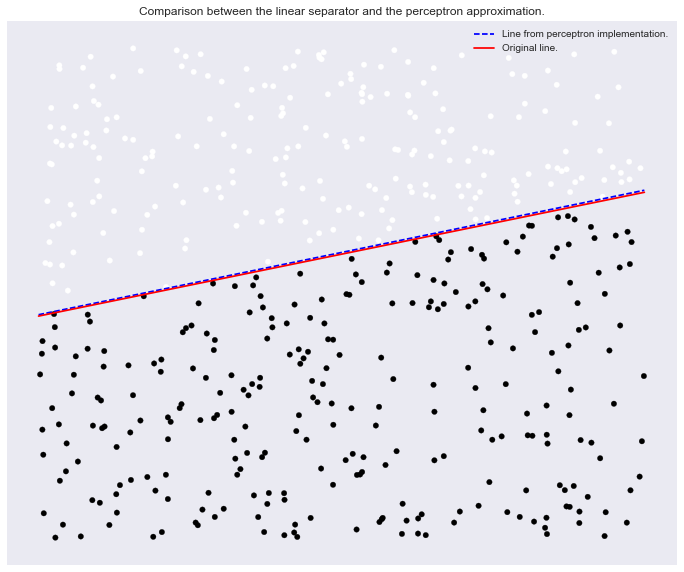

In [25]:
w= perceptron(xn,yn)
print(w)

# Using weights w to compute a,b for a line y=a*x+b
bnew = -w[0]/w[2];
anew = -w[1]/w[2];
y = lambda x: anew * x + bnew;

# Computing the colors for the points
sep_color = (yn+1)/2.0;

pl.figure();
figa = pl.gca()

pl.scatter(xn[:,0],xn[:,1],c=sep_color, s=30)
pl.plot(x,y(x),'b--',label='Line from perceptron implementation.')
pl.plot(x,f(x),'r',label='Original line.')
pl.legend()

pl.title('Comparison between the linear separator and the perceptron approximation.')

figa.axes.get_xaxis().set_visible(False)
figa.axes.get_yaxis().set_visible(False)



In [28]:
class Perceptron:
    'A simple Perceptron implementation.'
    def __init__(self, weights, bias, alpha=0.1):
        self.weights = weights
        self.bias = bias
        self.alpha = alpha
    
    def propagate(self, x):
        return self.activation(self.net(x)) 
        
    def activation(self, net):
        if net > 0:
            return 1
        return 0
    
    def net(self, x):
        return np.dot(self.weights, x) + self.bias
    
    def learn(self, x, y):
        y_hat = self.propagate(x)
        self.weights = [ w_i + self.alpha*x_i*(y-y_hat) for (w_i, x_i) in zip(self.weights, x)]
        self.bias = self.bias + self.alpha*(y-y_hat)
        return np.abs(y_hat - y)

In [29]:
size = 50 # size of data set

In [32]:
data = pd.DataFrame(columns=('$x_1$', '$x_2$'),
                    data=np.random.uniform(size=(size,2)))
data.head(6)

,$x_1$,$x_2$
0,0.000654,0.021060
1,0.503416,0.721357
2,0.537432,0.713684
3,0.985350,0.988556
4,0.292212,0.904975
5,0.542863,0.380130


condition

$$
y = \begin{cases}
    1 & \ \text{if}\ x_1 + x_2 > 1\,,\\
    0 & \ \text{otherwise}\,.
    \end{cases}
$$

In [35]:
def condition(x):
    return int(np.sum(x) > 1)

In [36]:
data['y'] = data.apply(condition, axis=1)

In [37]:
data.head(10)

,$x_1$,$x_2$,y
0,0.000654,0.021060,0
1,0.503416,0.721357,1
2,0.537432,0.713684,1
3,0.985350,0.988556,1
4,0.292212,0.904975,1
5,0.542863,0.380130,0
6,0.403241,0.462165,0
7,0.662594,0.412609,1
8,0.090109,0.749091,0
9,0.435119,0.448857,0


In [38]:
def plot_data(data, ax):
    data[data.y==1].plot(kind='scatter', 
                         x='$x_1$', y='$x_2$', 
                         color='green', ax=ax)
    data[data.y==0].plot(kind='scatter', 
                         x='$x_1$', y='$x_2$', 
                         color='red', ax=ax)
    ax.set_xlim(-0.1,1.1); ax.set_ylim(-0.1,1.1)

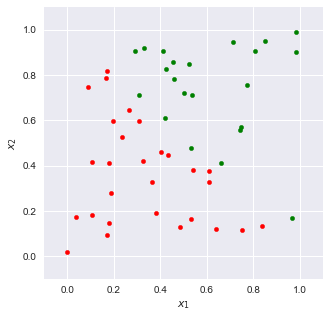

In [40]:
fig = pl.figure(figsize=(5,5))
plot_data(data, fig.gca())

In [41]:
def learn_data(perceptron, data):
    'Returns the number of errors made.'
    count = 0 
    for i, row in data.iterrows():
        count += perceptron.learn(row[0:2], row[2])
    return count

In [42]:
def threshold(perceptron, x_1):
    return (-perceptron.weights[0] * x_1 - perceptron.bias) / perceptron.weights[1]

In [43]:
def plot_perceptron_threshold(perceptron, ax):
    xlim = ax.get_xlim(); ylim = ax.get_ylim()
    
    x2s = [threshold(perceptron, x1) for x1 in xlim]
    ax.plot(xlim, x2s)
    
    ax.set_xlim(-0.1,1.1); ax.set_ylim(-0.1,1.1)

In [44]:
def plot_all(perceptron, data, t, ax=None):
    if ax==None:
        fig = plt.figure(figsize=(5,4))
        ax = fig.gca()
    plot_data(data, ax)
    plot_perceptron_threshold(perceptron, ax)
    
    ax.set_title('$t='+str(t+1)+'$')

In [45]:
perceptron = Perceptron([0.1,-0.1],0.02)

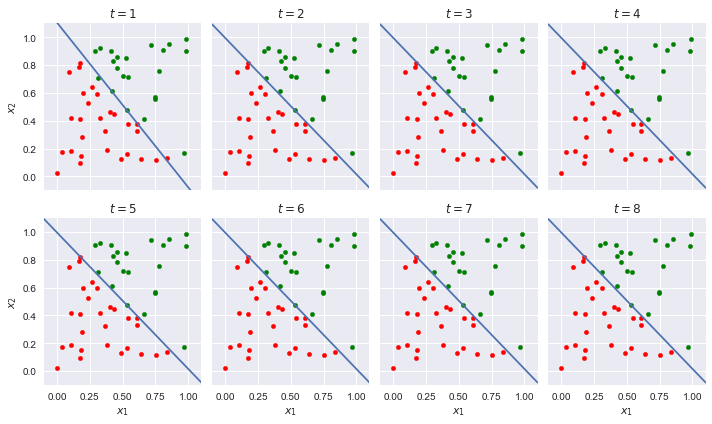

In [52]:
f, axarr = pl.subplots(2, 4, sharex=True, sharey=True, figsize=(10,6))
axs = list(itertools.chain.from_iterable(axarr))
for t in range(8):
    plot_all(perceptron, data, t, ax=axs[t])
    learn_data(perceptron, data)
f.tight_layout()